In [64]:
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
#from numpy import linspace
#from numpy import meshgrid


from Data import Data
from datetime import datetime


from scipy import stats

import scipy.stats as st

In [68]:
def spiParametersMle(x, dist=st.gamma):
    i = x == 0
    params = dist.fit(x[~i])
    q = len(x[i])/len(x)
    return(params, q)

def spiGeneratorMle(x, dist=st.gamma):
    i = x == 0

    params = dist.fit(x[~i])
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    G = dist.cdf(x[~i], loc=loc, scale=scale, *arg)

    q = len(x[i])/len(x)
    probabilities = np.zeros(len(x))
    probabilities[i] = q
    probabilities[~i] = q + (1 - q) * G
    result = st.norm.ppf(probabilities)
    return(result)

def spiGeneratorParamMle(x, params, q, dist=st.gamma):
    i = x == 0
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    G = dist.cdf(x[~i], loc=loc, scale=scale, *arg)

    if G == 1: G = 0.99
    if G == 0: G = 0.01
    probabilities = np.zeros(len(x))
    probabilities[i] = q
    probabilities[~i] = q + (1 - q) * G
    result = st.norm.ppf(probabilities)
    return(result)


In [81]:
ref = np.array([0,0,0,0,3,4,3,4])

In [82]:
params, q = spiParametersMle(ref)

In [83]:
q

0.5

In [84]:
x = [0]

In [85]:
spiGeneratorParamMle([0],params=params,q=q)

array([8.26526178e-13])

In [74]:
result = []
for i in range(len(ref)):
    result.append(spiGeneratorParamMle([ref[i]],params=params,q=q)[0])

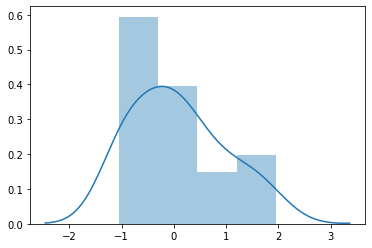

In [75]:
sns.distplot(result)